### CONTENTS
#### 1 Importing libraries
#### 2 Importing data 
#### 3 Data wrangling
#### 4 Dendograms on scaled data
#### 5 Comparing classifications based on cluster analysis and true classifications

# 1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

# 2 Importing data

In [3]:
path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'

In [4]:
# Upload original data

In [5]:
climate = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [9]:
climate.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [12]:
# Import the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 3 Data wrangling

In [15]:
climate.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)

In [17]:
print(climate["DATE"].dtype)

int64


In [152]:
# Select data for year 2020

In [19]:
climate_2020 = climate[(climate["DATE"] >= 20200101) & (climate["DATE"] <= 20201231)]

climate_2020.shape

In [22]:
climate_2020.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
21915  20200101      1                  0               1.7            0.87   
21916  20200102      1                  0               3.1            0.87   
21917  20200103      1                  7               2.2            0.81   
21918  20200104      1                  6               2.3            0.79   
21919  20200105      1                  0               0.9            0.85   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
21915          1.0339                    0.64                 0.00   
21916          1.0316                    0.65                 0.00   
21917          1.0287                    0.41                 0.01   
21918          1.0341                    0.29                 0.14   
21919          1.0367                    0.67                 0.00   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
21915                 0             6.5  ...                     5   
21916                 0             6.5  ...                     5   
21917                 0             1.6  ...                     5   
21918                 0             0.9  ...                     5   
21919                 0             6.6  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
21915               0.82             1.0142                       1.13   
21916               0.82             1.0142                       1.13   
21917               0.82             1.0142                       1.13   
21918               0.82             1.0142                       1.13   
21919               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
21915                    0.41                    0                3.4   
21916                    0.41                    0                3.4   
21917                    0.41                    0                3.4   
21918                    0.41                    0                3.4   
21919                    0.41                    0                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
21915                10.7                7.9               13.5  
21916                10.7                7.9               13.5  
21917                10.7                7.9               13.5  
21918                10.7                7.9               13.5  
21919                10.7                7.9               13.5  

[5 rows x 170 columns]

In [24]:
len(climate_2020)

366

In [154]:
# Drop weather stations for which pleasant/unpleasant classification is not available

In [26]:
cols_to_drop = [col for col in climate_2020.columns if any(city in col for city in ['GDANSK', 'ROMA', 'TOURS'])]


In [28]:
climate_2020 = climate_2020.drop(columns=cols_to_drop)

In [30]:
# Scaling

In [32]:
# Initialize the scaler
scaler = StandardScaler()

In [34]:
# Split DataFrame: keep first 3 columns unchanged, scale the rest
climate_2020_fixed = climate_2020.iloc[:, :2]          # First 2 columns
climate_2020_to_scale = climate_2020.iloc[:, 2:]       # Remaining columns

In [36]:
# Apply scaler
scaled_array = scaler.fit_transform(climate_2020_to_scale)

In [38]:
# Convert scaled array back to DataFrame
df_scaled = pd.DataFrame(scaled_array, columns=climate_2020_to_scale.columns, index=climate_2020.index)

In [40]:
# Combine the unscaled and scaled DataFrames
df_final = pd.concat([climate_2020_fixed, df_scaled], axis=1)

In [42]:
df_final.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
21915  20200101      1          -1.960538         -0.321292        1.201295   
21916  20200102      1          -1.960538          1.025927        1.201295   
21917  20200103      1           0.875655          0.159857        0.764099   
21918  20200104      1           0.470485          0.256087        0.618367   
21919  20200105      1          -1.960538         -1.091132        1.055563   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
21915        1.910115               -0.711243            -0.486323   
21916        1.634160               -0.700149            -0.486323   
21917        1.286217               -0.966410            -0.460008   
21918        1.934111               -1.099541            -0.117914   
21919        2.246060               -0.677960            -0.486323   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
21915               0.0        0.185369  ...                   0.0   
21916               0.0        0.185369  ...                   0.0   
21917               0.0       -0.854160  ...                   0.0   
21918               0.0       -1.002664  ...                   0.0   
21919               0.0        0.206584  ...                   0.0   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
21915      -1.110223e-16      -2.220446e-16               4.440892e-16   
21916      -1.110223e-16      -2.220446e-16               4.440892e-16   
21917      -1.110223e-16      -2.220446e-16               4.440892e-16   
21918      -1.110223e-16      -2.220446e-16               4.440892e-16   
21919      -1.110223e-16      -2.220446e-16               4.440892e-16   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
21915           -5.551115e-17                  0.0       8.881784e-16   
21916           -5.551115e-17                  0.0       8.881784e-16   
21917           -5.551115e-17                  0.0       8.881784e-16   
21918           -5.551115e-17                  0.0       8.881784e-16   
21919           -5.551115e-17                  0.0       8.881784e-16   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
21915       -3.552714e-15                0.0                0.0  
21916       -3.552714e-15                0.0                0.0  
21917       -3.552714e-15                0.0                0.0  
21918       -3.552714e-15                0.0                0.0  
21919       -3.552714e-15                0.0                0.0  

[5 rows x 149 columns]

Scaled dataframe with data for 2020 only for 15 weather stations

In [45]:
# Export data file in case it's needed for other analyses
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'weather2020_scaled.pkl'))

# 4 Dendograms on scaled data

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [50]:
# Prepare the full dataset for clustering by removing DATE and MONTH
# As not to write out all the column headers 

X_all_stations = df_final.drop(columns=['DATE', 'MONTH'])

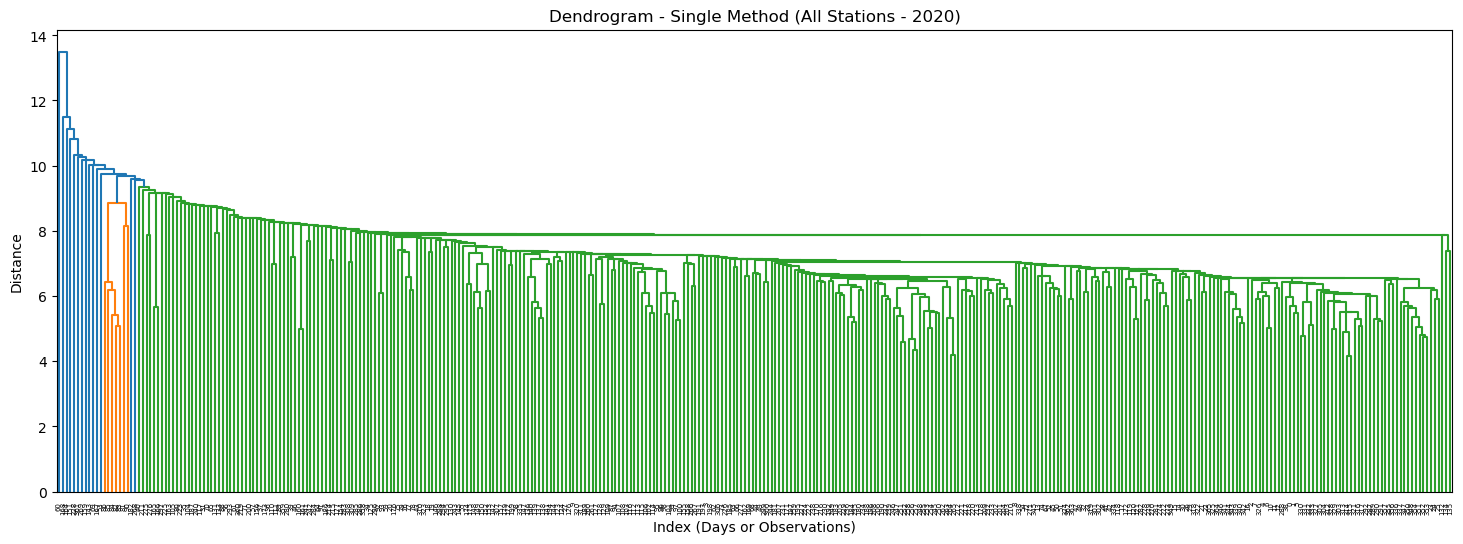

In [52]:
# Single linkage method for all stations
distance_single = linkage(X_all_stations, method='single')

plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title("Dendrogram - Single Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

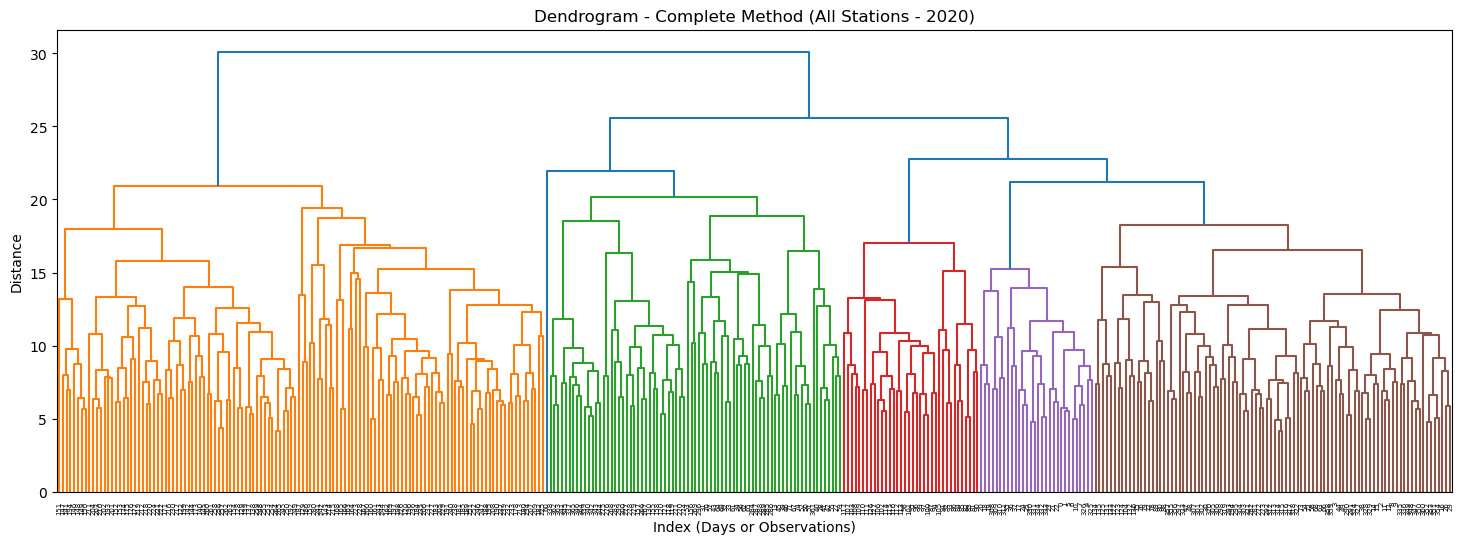

In [53]:
# Complete linkage method for all stations
distance_complete = linkage(X_all_stations, method='complete')

plt.figure(figsize=(18, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title("Dendrogram - Complete Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

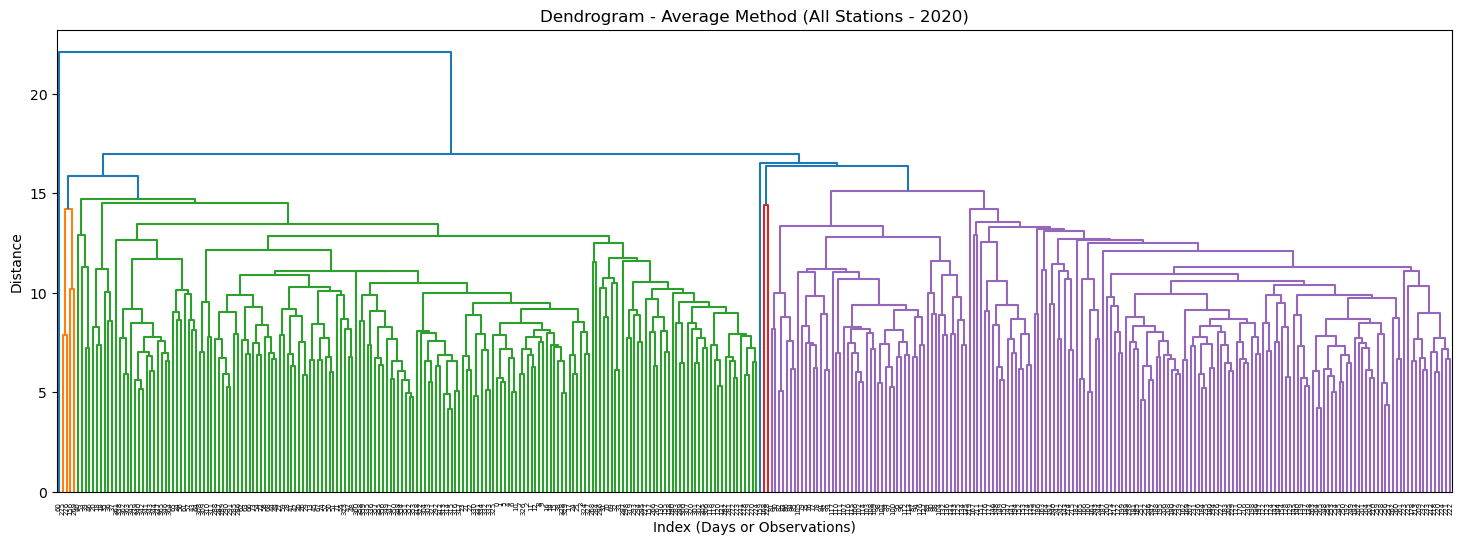

In [55]:
# Average linkage method for all stations
distance_average = linkage(X_all_stations, method='average')

plt.figure(figsize=(18, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title("Dendrogram - Average Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

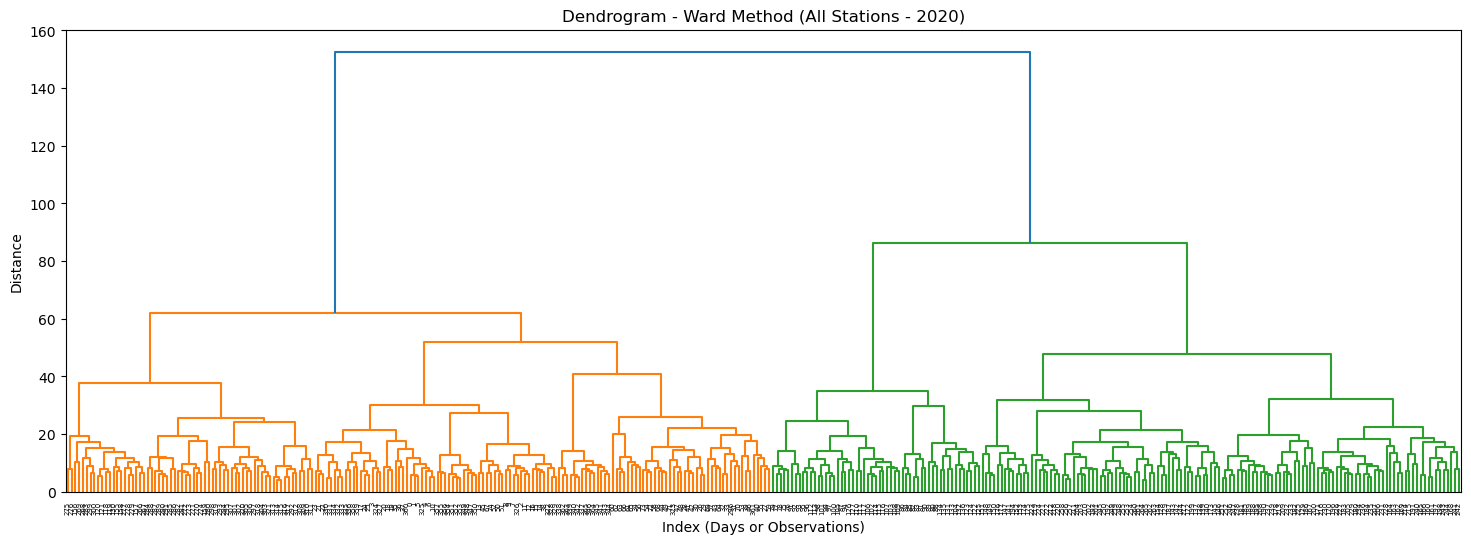

In [56]:
# Ward linkage method for all stations
distance_ward = linkage(X_all_stations, method='ward')

plt.figure(figsize=(18, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title("Dendrogram - Ward Method (All Stations - 2020)")
plt.xlabel("Index (Days or Observations)")
plt.ylabel("Distance")
plt.show()

In [58]:
# Choose number of clusters (e.g., 2 based on dendrogram)
cluster_labels = fcluster(distance_ward, t=2, criterion='maxclust')

In [60]:
df_with_clusters = df_final.copy()

In [64]:
df_with_clusters['Cluster'] = cluster_labels

In [66]:
df_with_clusters['Cluster'].value_counts()

Cluster
1    185
2    181
Name: count, dtype: int64

In [156]:
# Scaled dataframe with clusters classifications

In [68]:
df_with_clusters.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
21915  20200101      1          -1.960538         -0.321292        1.201295   
21916  20200102      1          -1.960538          1.025927        1.201295   
21917  20200103      1           0.875655          0.159857        0.764099   
21918  20200104      1           0.470485          0.256087        0.618367   
21919  20200105      1          -1.960538         -1.091132        1.055563   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
21915        1.910115               -0.711243            -0.486323   
21916        1.634160               -0.700149            -0.486323   
21917        1.286217               -0.966410            -0.460008   
21918        1.934111               -1.099541            -0.117914   
21919        2.246060               -0.677960            -0.486323   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_humidity  \
21915               0.0        0.185369  ...      -1.110223e-16   
21916               0.0        0.185369  ...      -1.110223e-16   
21917               0.0       -0.854160  ...      -1.110223e-16   
21918               0.0       -1.002664  ...      -1.110223e-16   
21919               0.0        0.206584  ...      -1.110223e-16   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
21915      -2.220446e-16               4.440892e-16           -5.551115e-17   
21916      -2.220446e-16               4.440892e-16           -5.551115e-17   
21917      -2.220446e-16               4.440892e-16           -5.551115e-17   
21918      -2.220446e-16               4.440892e-16           -5.551115e-17   
21919      -2.220446e-16               4.440892e-16           -5.551115e-17   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
21915                  0.0       8.881784e-16       -3.552714e-15   
21916                  0.0       8.881784e-16       -3.552714e-15   
21917                  0.0       8.881784e-16       -3.552714e-15   
21918                  0.0       8.881784e-16       -3.552714e-15   
21919                  0.0       8.881784e-16       -3.552714e-15   

       VALENTIA_temp_min  VALENTIA_temp_max  Cluster  
21915                0.0                0.0        1  
21916                0.0                0.0        1  
21917                0.0                0.0        1  
21918                0.0                0.0        1  
21919                0.0                0.0        1  

[5 rows x 150 columns]

# 5 Comparing classifications based on cluster analysis and true classifications

In [159]:
# Add true pleasant/unpleasant classifications into the main dataframe

In [70]:
pleasantweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [72]:
pleasantweather_2020 = pleasantweather[(pleasantweather["DATE"] >= 20200101) & (pleasantweather["DATE"] <= 20201231)]

In [74]:
pleasantweather_BASEL = pleasantweather_2020[['DATE', 'BASEL_pleasant_weather']]

In [82]:
# Merge file with clusters and pleasant weather labels for one weather station, BASEL

In [76]:
merged_df = df_with_clusters.merge(pleasantweather_BASEL, on='DATE', how='left')

In [78]:
merged_df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  20200101      1          -1.960538         -0.321292        1.201295   
1  20200102      1          -1.960538          1.025927        1.201295   
2  20200103      1           0.875655          0.159857        0.764099   
3  20200104      1           0.470485          0.256087        0.618367   
4  20200105      1          -1.960538         -1.091132        1.055563   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0        1.910115               -0.711243            -0.486323   
1        1.634160               -0.700149            -0.486323   
2        1.286217               -0.966410            -0.460008   
3        1.934111               -1.099541            -0.117914   
4        2.246060               -0.677960            -0.486323   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_pressure  \
0               0.0        0.185369  ...      -2.220446e-16   
1               0.0        0.185369  ...      -2.220446e-16   
2               0.0       -0.854160  ...      -2.220446e-16   
3               0.0       -1.002664  ...      -2.220446e-16   
4               0.0        0.206584  ...      -2.220446e-16   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0               4.440892e-16           -5.551115e-17                  0.0   
1               4.440892e-16           -5.551115e-17                  0.0   
2               4.440892e-16           -5.551115e-17                  0.0   
3               4.440892e-16           -5.551115e-17                  0.0   
4               4.440892e-16           -5.551115e-17                  0.0   

   VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
0       8.881784e-16       -3.552714e-15                0.0   
1       8.881784e-16       -3.552714e-15                0.0   
2       8.881784e-16       -3.552714e-15                0.0   
3       8.881784e-16       -3.552714e-15                0.0   
4       8.881784e-16       -3.552714e-15                0.0   

   VALENTIA_temp_max  Cluster  BASEL_pleasant_weather  
0                0.0        1                       0  
1                0.0        1                       0  
2                0.0        1                       0  
3                0.0        1                       0  
4                0.0        1                       0  

[5 rows x 151 columns]

In [80]:
len(merged_df)

366

In [161]:
# Need to compare clusters and true classifications.
# Choose two weather features as x and y to plot the scatterplot 

<Axes: title={'center': 'Pleasant'}, xlabel='BASEL_precipitation', ylabel='BASEL_temp_mean'>

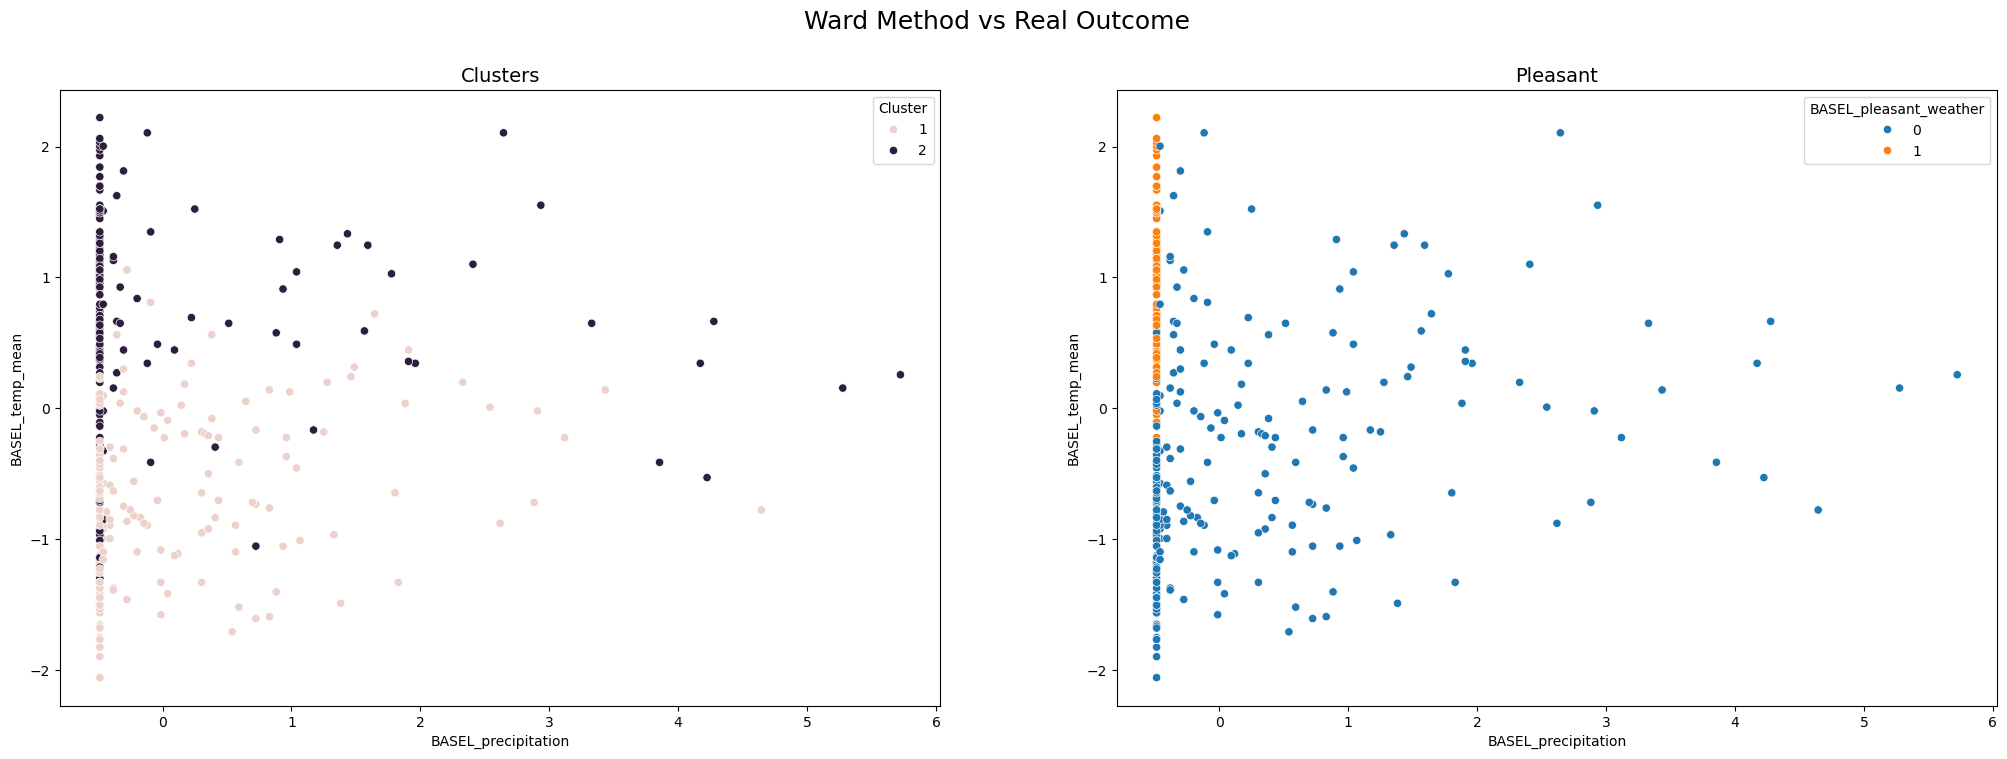

In [84]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method vs Real Outcome",fontsize=18)

plt.subplot(1,2,1)
plt.title("Clusters",fontsize=14)
sns.scatterplot(x="BASEL_precipitation",y="BASEL_temp_mean", data=merged_df, hue="Cluster")

plt.subplot(1,2,2)
plt.title("Pleasant",fontsize=14)
sns.scatterplot(x="BASEL_precipitation",y="BASEL_temp_mean", data=merged_df, hue="BASEL_pleasant_weather")


<Axes: title={'center': 'Pleasant'}, xlabel='BASEL_sunshine', ylabel='BASEL_temp_mean'>

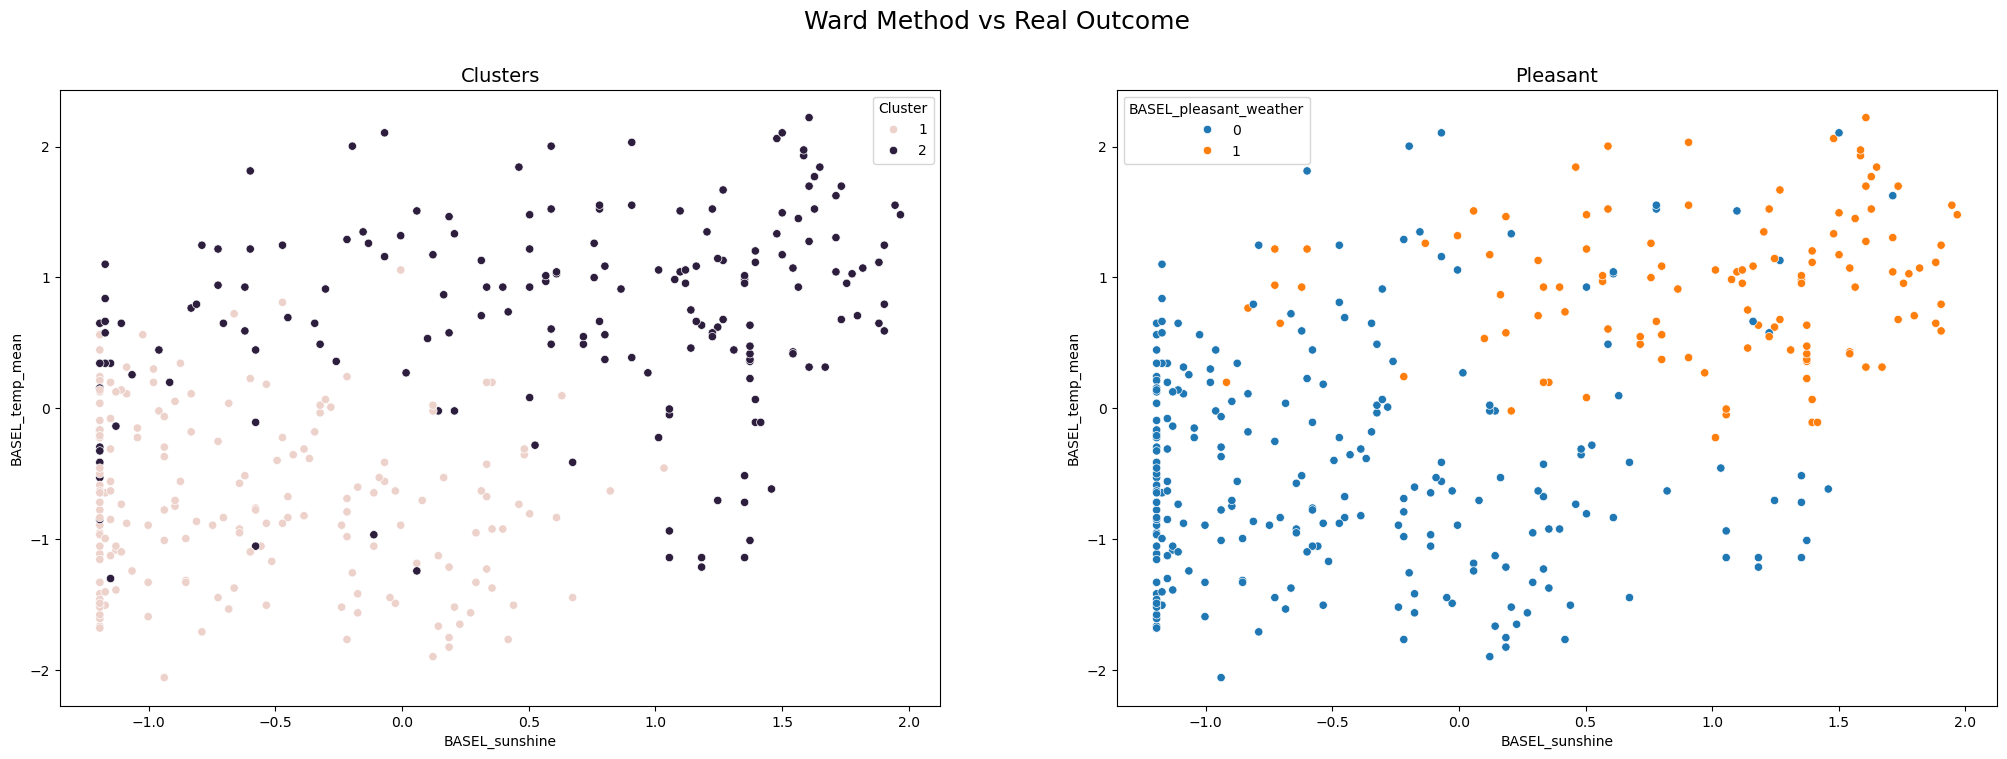

In [86]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Ward Method vs Real Outcome",fontsize=18)

plt.subplot(1,2,1)
plt.title("Clusters",fontsize=14)
sns.scatterplot(x="BASEL_sunshine",y="BASEL_temp_mean", data=merged_df, hue="Cluster")

plt.subplot(1,2,2)
plt.title("Pleasant",fontsize=14)
sns.scatterplot(x="BASEL_sunshine",y="BASEL_temp_mean", data=merged_df, hue="BASEL_pleasant_weather")

C:\Users\elena\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: title={'center': 'Clusters'}, xlabel='BASEL_pleasant_weather', ylabel='Cluster'>

C:\Users\elena\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\elena\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


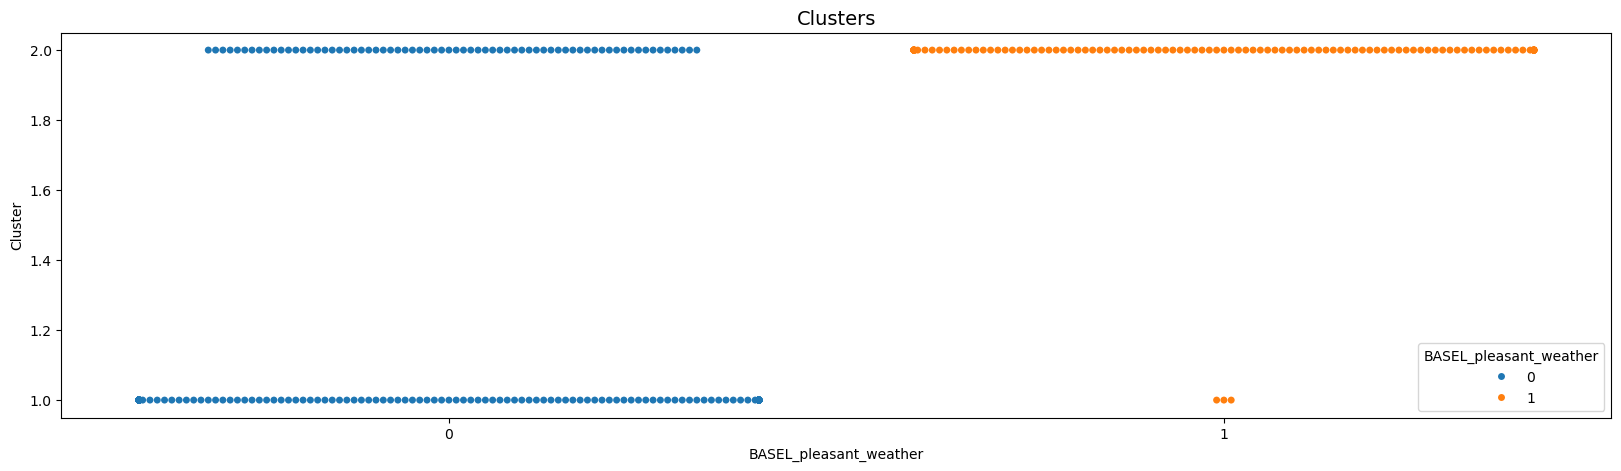

In [88]:
plt.figure(figsize=(20,5))
plt.title("Clusters",fontsize=14)
sns.swarmplot(x="BASEL_pleasant_weather",y="Cluster", data=merged_df, hue="BASEL_pleasant_weather")

<Axes: xlabel='BASEL_pleasant_weather', ylabel='Cluster'>

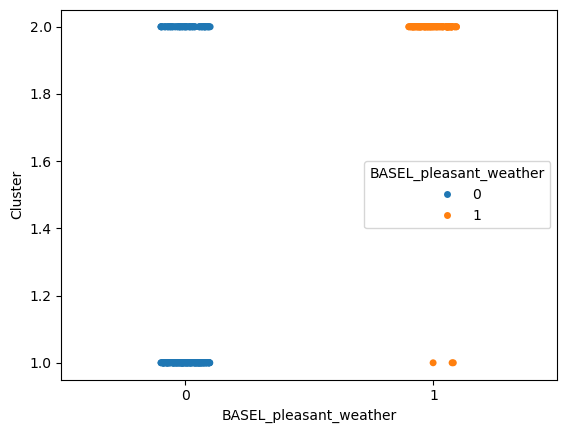

In [90]:
import seaborn as sns

sns.stripplot(x='BASEL_pleasant_weather', y='Cluster', data=merged_df, jitter=True, hue="BASEL_pleasant_weather")

<Axes: xlabel='BASEL_pleasant_weather', ylabel='Cluster'>

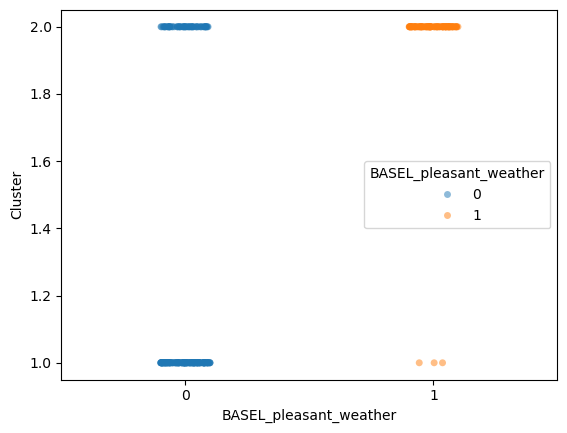

In [92]:
sns.stripplot(x='BASEL_pleasant_weather', y='Cluster', data=merged_df, jitter=True, alpha=0.5, hue="BASEL_pleasant_weather")